In [83]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers 


In [84]:
df = pd.read_csv('Classify-2DwLabels-1.txt', sep=',', header=None, names=["Col1", "Col2", "Class"])
df["Class"] = df[["Class"]].replace(0,-1)
df.head()

,Col1,Col2,Class
0,-0.22,0.59,-1
1,-0.35,0.12,-1
2,0.36,0.80,1
3,-0.34,0.10,-1
4,0.44,0.77,1


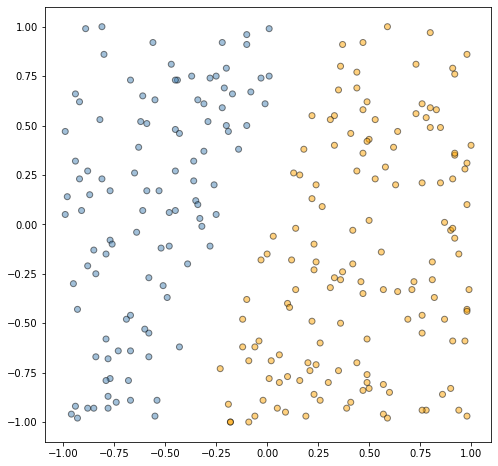

In [85]:
X = df[["Col1", "Col2"]].to_numpy()
y = df[["Class"]].to_numpy()
plt.figure(figsize=(8, 8))
colors = ["steelblue", "orange"]
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), alpha=0.5, cmap=matplotlib.colors.ListedColormap(colors), edgecolors="black")
plt.show()

In [86]:
n = X.shape[0]
H = np.dot(y*X, (y*X).T)
q = np.repeat([-1.0], n)[..., None]
A = y.reshape(1, -1)
b = 0.0
G = np.negative(np.eye(n))
h = np.zeros(n)
A = A.astype('float')

In [87]:
P = matrix(H)
q = matrix(q)
G = matrix(G)
h = matrix(h)
A = matrix(A)
b = matrix(b)

In [89]:
sol = solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol["x"])

     pcost       dcost       gap    pres   dres
 0: -5.4735e+01 -1.1045e+02  9e+02  3e+01  2e+00
 1: -9.5785e+01 -6.9950e+01  2e+02  8e+00  6e-01
 2: -1.2821e+02 -7.5692e+01  2e+02  5e+00  4e-01
 3: -6.5002e+01 -4.5788e+01  6e+01  1e+00  9e-02
 4: -4.0571e+01 -4.0014e+01  5e+00  8e-02  6e-03
 5: -3.9642e+01 -3.9588e+01  8e-01  2e-02  1e-03
 6: -3.9456e+01 -3.9563e+01  2e-01  1e-03  8e-05
 7: -3.9552e+01 -3.9554e+01  2e-03  2e-05  1e-06
 8: -3.9554e+01 -3.9554e+01  2e-05  2e-07  1e-08
 9: -3.9554e+01 -3.9554e+01  2e-07  2e-09  1e-10
Optimal solution found.


In [90]:
w = np.dot((y * alphas).T, X)[0]

In [91]:
S = (alphas > 1e-5).flatten()
b = np.mean(y[S] - np.dot(X[S], w.reshape(-1,1)))

In [92]:
print("W:", w)
print("b:", b)

W: [ 8.41346154 -2.88461538]
b: 0.8293269239085331


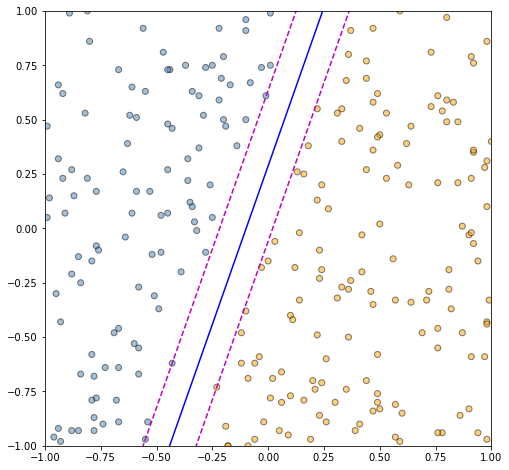

In [93]:
x_min = -1
x_max = 1
y_min = -1
y_max = 1
xx = np.linspace(x_min, x_max)
a = -w[0]/w[1]
yy = a*xx - (b)/w[1]
margin = 1 / np.sqrt(np.sum(w**2))
yy_neg = yy - np.sqrt(1 + a**2) * margin
yy_pos = yy + np.sqrt(1 + a**2) * margin
plt.figure(figsize=(8, 8))
plt.plot(xx, yy, "b-")
plt.plot(xx, yy_neg, "m--")
plt.plot(xx, yy_pos, "m--")
colors = ["steelblue", "orange"]
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), alpha=0.5, cmap=matplotlib.colors.ListedColormap(colors), edgecolors="black")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()